In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [124]:
df = pd.read_csv('data/churn_train.csv')

In [125]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [126]:
df['avg_rating_of_driver'].fillna(-10, inplace=True)

In [127]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,-10.0,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,-10.0,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,-10.0,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [65]:
df['days_since_last_trip'] = (dt.datetime.strptime('2014-07-01', "%Y-%m-%d") - df['last_trip_date']).dt.days

In [113]:
df.loc[df['days_since_last_trip'] > 30,'churned'] = True
df.loc[df['days_since_last_trip'] <= 30,'churned'] = False

KeyError: 'days_since_last_trip'

In [101]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,days_since_last_trip,churned,rated_driver
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,59,1.0,NaN
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,156,1.0,NaN
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,41,1.0,0.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,172,1.0,0.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,49,1.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a79fe10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11aed5990>]], dtype=object)

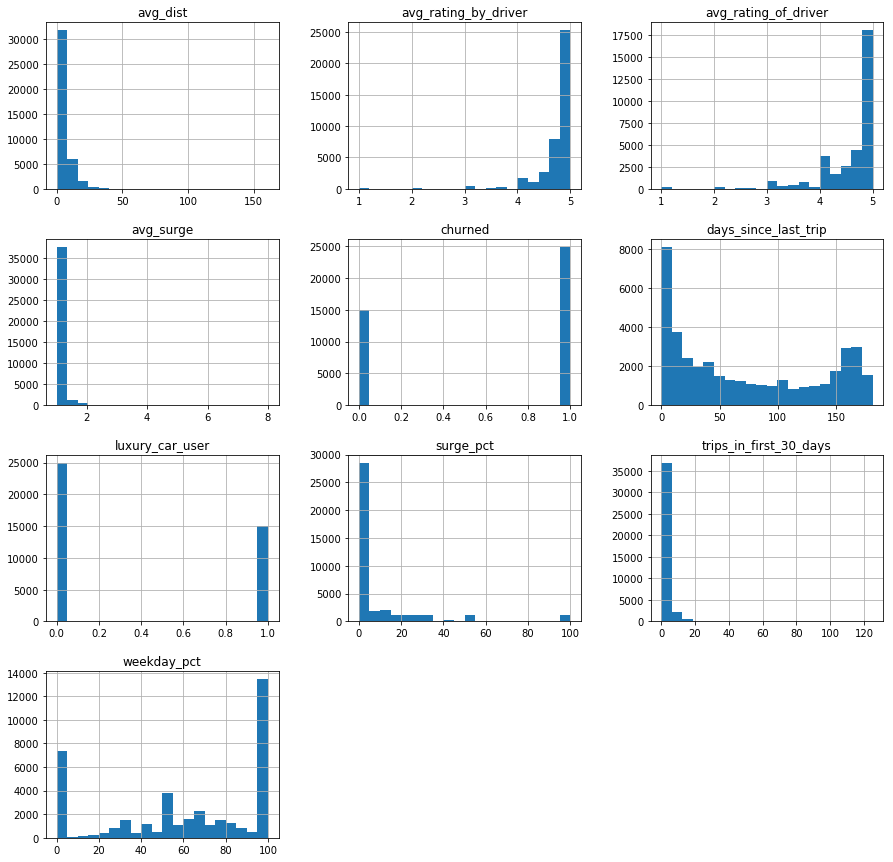

In [84]:
df.hist(figsize=(15,15), bins=20)

In [86]:
for feature in df.columns:
    print feature, sum(pd.isnull(df[feature]))

avg_dist 0
avg_rating_by_driver 162
avg_rating_of_driver 6528
avg_surge 0
city 0
last_trip_date 0
phone 319
signup_date 0
surge_pct 0
trips_in_first_30_days 0
luxury_car_user 0
weekday_pct 0
days_since_last_trip 0
churned 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1288fb650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12c2c5910>]], dtype=object)

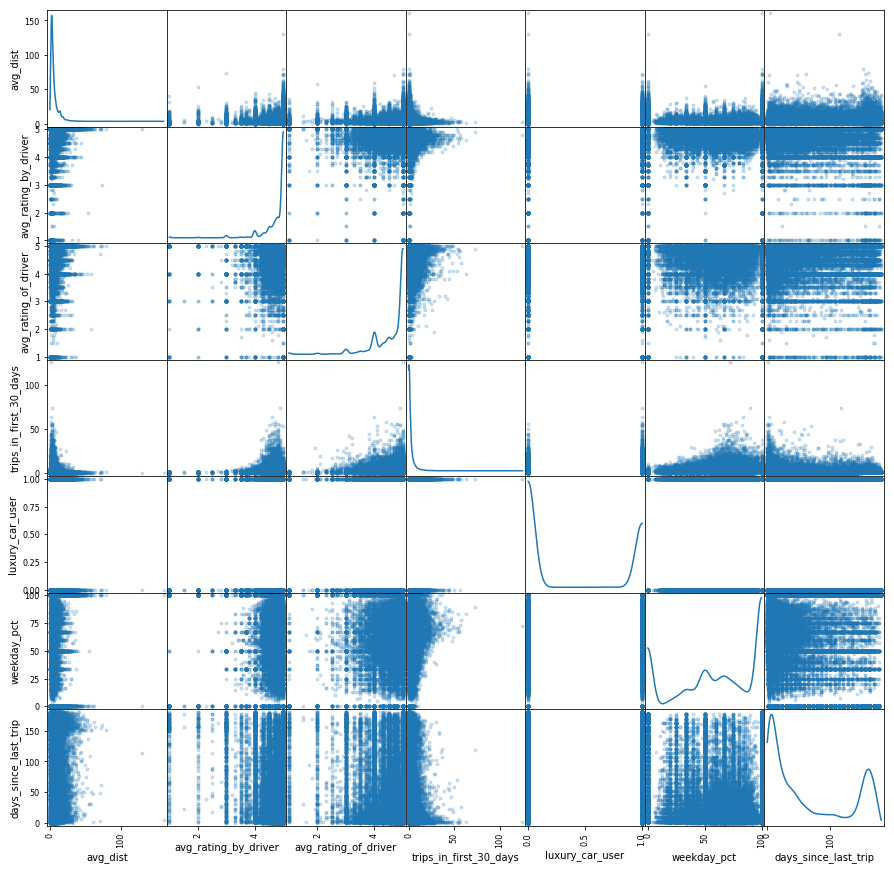

In [94]:
scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'phone', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'days_since_last_trip']], alpha=0.2, figsize=(15, 15), diagonal='kde')

In [96]:
df.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,days_since_last_trip,churned
avg_dist,1.000000,0.082303,0.036917,-0.079488,-0.102349,-0.135228,0.025824,0.097445,0.108265,0.093371
avg_rating_by_driver,0.082303,1.000000,0.118703,0.007859,0.018849,-0.039282,0.010300,0.021552,0.033876,0.027461
avg_rating_of_driver,0.036917,0.118703,1.000000,-0.033829,-0.010436,-0.013720,0.001759,0.013224,0.016846,0.012902
avg_surge,-0.079488,0.007859,-0.033829,1.000000,0.793842,-0.001829,-0.075544,-0.113054,0.018455,0.003146
surge_pct,-0.102349,0.018849,-0.010436,0.793842,1.000000,0.004746,-0.103531,-0.147969,-0.002873,-0.011551
trips_in_first_30_days,-0.135228,-0.039282,-0.013720,-0.001829,0.004746,1.000000,0.114741,0.049731,-0.167532,-0.210677
luxury_car_user,0.025824,0.010300,0.001759,-0.075544,-0.103531,0.114741,1.000000,0.033478,-0.168669,-0.206902
weekday_pct,0.097445,0.021552,0.013224,-0.113054,-0.147969,0.049731,0.033478,1.000000,-0.021216,-0.008383
days_since_last_trip,0.108265,0.033876,0.016846,0.018455,-0.002873,-0.167532,-0.168669,-0.021216,1.000000,0.780392
churned,0.093371,0.027461,0.012902,0.003146,-0.011551,-0.210677,-0.206902,-0.008383,0.780392,1.000000
